# 1 - Perkenalan

Nama Peneliti:Suma Bimantoro Andru


Objective:Memprediksi harga perjalanan platform ride-hailing 

# 2 - Import Libraries

In [222]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR

# 3 - Data Loading

In [223]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [224]:
# Load Dataset

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/phase1/GC1/dataset/rideshare_kaggle.csv')
data

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [225]:
# Duplicate Dataset

data_copy = data.copy()

In [226]:
#cari informasi dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

<p>Ada total 57 column</p>

In [227]:
#check dataset - 2
data.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,...,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,...,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,...,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


<p>terlihat untuk transaksi median di angka 13.5 dan max transaksi ada di 97.5</p>

# 4 - Exploratory Data Analysis (EDA)

Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

In [228]:
#cek isi dataset
data['timezone'].unique()

array(['America/New_York'], dtype=object)

<p>timezone hanya berisi 1 yaitu America/Newyork, personal judgmen artinya tidak ada hubungannya dengan price

In [229]:
#cek isi dataset
data['cab_type'].unique()

array(['Lyft', 'Uber'], dtype=object)

<p>ada 2 tipe lyft dan Uber

In [230]:
#cek isi dataset
data['product_id'].unique()

array(['lyft_line', 'lyft_premier', 'lyft', 'lyft_luxsuv', 'lyft_plus',
       'lyft_lux', '6f72dfc5-27f1-42e8-84db-ccc7a75f6969',
       '6c84fd89-3f11-4782-9b50-97c468b19529',
       '55c66225-fbe7-4fd5-9072-eab1ece5e23e',
       '9a0e7b09-b92b-4c41-9779-2ad22b4d779d',
       '6d318bcc-22a3-4af6-bddd-b409bfce1546',
       '997acbb5-e102-41e1-b155-9df7de0a73f2',
       '8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a'], dtype=object)

<p>personal judgmen, karena product id dipakai lebih dari 1 user jadi tidak ada hub dengan harga

In [231]:
#cek isi dataset
data['name'].unique()

array(['Shared', 'Lux', 'Lyft', 'Lux Black XL', 'Lyft XL', 'Lux Black',
       'UberXL', 'Black', 'UberX', 'WAV', 'Black SUV', 'UberPool', 'Taxi'],
      dtype=object)

<p>tipe mobil kemungkinan korelasi dengan harga

In [232]:
#cek isi dataset
data['distance']

0         0.44
1         0.44
2         0.44
3         0.44
4         0.44
          ... 
693066    1.00
693067    1.00
693068    1.00
693069    1.00
693070    1.00
Name: distance, Length: 693071, dtype: float64

<p>distance juga ada kemungkinan korelasi dengan price



In [233]:
#cek isi dataset
data['id'].unique()

array(['424553bb-7174-41ea-aeb4-fe06d4f4b9d7',
       '4bd23055-6827-41c6-b23b-3c491f24e74d',
       '981a3613-77af-4620-a42a-0c0866077d1e', ...,
       '64d451d0-639f-47a4-9b7c-6fd92fbd264f',
       '727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e',
       'e7fdc087-fe86-40a5-a3c3-3b2a8badcbda'], dtype=object)

In [234]:
#cek isi dataset count 'id'
data['id'].nunique()

693071

<p>ada kemungkinan id tidak berkorelasi dengan harga

In [235]:
#cek isi dataset
data['surge_multiplier'].unique()

array([1.  , 1.25, 2.5 , 2.  , 1.75, 1.5 , 3.  ])

<p>pengali harga karena ada sesuatu , harusnnya corelasi dengan target price

In [236]:
#cek isi dataset
data['source'].unique()

array(['Haymarket Square', 'Back Bay', 'North End', 'North Station',
       'Beacon Hill', 'Boston University', 'Fenway', 'South Station',
       'Theatre District', 'West End', 'Financial District',
       'Northeastern University'], dtype=object)

<p>ada 12 tempat penjemputan atau pengambilan penumpang

In [237]:
#cek isi dataset
data['destination'].unique()

array(['North Station', 'Northeastern University', 'West End',
       'Haymarket Square', 'South Station', 'Fenway', 'Theatre District',
       'Beacon Hill', 'Back Bay', 'North End', 'Financial District',
       'Boston University'], dtype=object)

ada 12 tempat pengantaran penumpang

In [238]:
#cek isi dataset
data['temperature'].unique()

array([42.34, 43.58, 38.33, 34.38, 37.44, 38.75, 41.99, 49.88, 45.58,
       45.45, 40.13, 41.47, 20.38, 32.85, 41.29, 31.25, 43.49, 36.99,
       40.36, 42.95, 24.71, 37.11, 42.42, 42.02, 40.4 , 40.68, 44.94,
       39.75, 45.35, 48.83, 43.73, 48.23, 45.82, 38.54, 34.81, 39.02,
       38.95, 42.5 , 27.93, 45.84, 34.4 , 41.09, 43.96, 47.95, 41.16,
       32.07, 43.51, 36.5 , 43.65, 47.27, 41.3 , 48.12, 39.35, 43.61,
       57.22, 33.15, 18.97, 40.43, 46.66, 40.92, 38.74, 25.21, 31.8 ,
       48.43, 52.1 , 37.83, 35.98, 49.7 , 47.56, 38.61, 40.38, 20.01,
       40.47, 37.95, 37.28, 18.91, 41.6 , 40.29, 24.61, 34.26, 42.81,
       37.26, 41.35, 46.3 , 54.62, 31.87, 37.92, 45.69, 41.  , 46.36,
       26.21, 42.27, 25.55, 29.05, 38.41, 50.43, 46.78, 19.28, 43.91,
       41.91, 42.25, 48.45, 35.54, 32.31, 46.23, 54.38, 39.13, 43.99,
       30.8 , 27.71, 53.51, 44.15, 33.71, 34.87, 44.34, 20.07, 42.21,
       20.42, 42.11, 42.01, 45.16, 44.93, 41.19, 38.19, 35.95, 29.36,
       43.02, 43.64,

In [239]:
#cek isi dataset
data['apparentTemperature'].unique()

array([37.12, 37.35, 32.93, 29.63, 30.88, 33.51, 41.99, 49.22, 45.58,
       41.77, 38.  , 35.66, 38.08, 20.38, 32.85, 36.01, 31.25, 37.19,
       32.27, 35.52, 37.54, 12.26, 31.86, 37.83, 42.02, 35.63, 37.1 ,
       42.13, 35.21, 43.63, 48.83, 37.84, 46.21, 43.92, 36.11, 34.81,
       34.01, 36.97, 36.47, 27.93, 43.  , 29.99, 36.6 , 40.8 , 46.74,
       35.84, 27.22, 43.51, 36.5 , 37.25, 47.27, 41.3 , 48.12, 33.  ,
       37.38, 57.22, 30.6 , 13.84, 34.59, 44.16, 35.13, 32.35, 13.25,
       31.8 , 48.43, 39.09, 52.1 , 30.56, 31.03, 49.7 , 46.32, 32.4 ,
       35.18, 15.11, 35.92, 32.46, 34.6 , 14.24, 39.31, 34.73, 12.13,
       30.15, 38.23, 43.61, 32.04, 35.62, 44.19, 54.62, 27.83, 31.91,
       45.69, 34.42, 44.64, 14.47, 39.99, 21.85, 24.17, 38.41, 50.43,
       46.78, 13.96, 38.21, 36.71, 37.39, 48.45, 30.98, 28.18, 43.49,
       54.38, 34.07, 43.99, 20.78, 32.  , 27.71, 53.51, 42.54, 25.35,
       28.73, 39.93, 14.02, 37.73, 15.44, 37.66, 41.  , 38.03, 41.07,
       36.49, 38.19,

In [240]:
#cek isi dataset
data['short_summary'].unique()

array([' Mostly Cloudy ', ' Rain ', ' Clear ', ' Partly Cloudy ',
       ' Overcast ', ' Light Rain ', ' Foggy ', ' Possible Drizzle ',
       ' Drizzle '], dtype=object)

<p>ada terdapat 9 status kategori
' Mendung ', ' Hujan ', ' Cerah ', ' Mendung Sebagian ',
       ' Mendung ', ' Hujan Ringan ', ' Berkabut ', ' Kemungkinan Gerimis ',
       ' Gerimis'

In [241]:
#cek isi dataset
data['long_summary'].unique()

array([' Rain throughout the day. ',
       ' Rain until morning, starting again in the evening. ',
       ' Light rain in the morning. ',
       ' Partly cloudy throughout the day. ',
       ' Mostly cloudy throughout the day. ',
       ' Light rain in the morning and overnight. ',
       ' Light rain until evening. ', ' Foggy in the morning. ',
       ' Overcast throughout the day. ',
       ' Possible drizzle in the morning. ',
       ' Rain in the morning and afternoon. '], dtype=object)

In [242]:
#cek isi dataset
data.groupby("long_summary").size()

long_summary
 Foggy in the morning.                                   44772
 Light rain in the morning and overnight.                50544
 Light rain in the morning.                             102485
 Light rain until evening.                               35568
 Mostly cloudy throughout the day.                      202340
 Overcast throughout the day.                             7488
 Partly cloudy throughout the day.                      145279
 Possible drizzle in the morning.                         1872
 Rain in the morning and afternoon.                        504
 Rain throughout the day.                                54288
 Rain until morning, starting again in the evening.      47931
dtype: int64

<p>ada 12 kategori status :'Hujan sepanjang hari. ',
       ' Hujan sampai pagi, mulai lagi di malam hari. ',
       ' Hujan ringan di pagi hari. ',
       ' Berawan sepanjang hari. ',
       ' Sebagian besar berawan sepanjang hari. ',
       ' Hujan ringan pada pagi dan malam hari. ',
       'Hujan ringan sampai sore. ', ' Pagi berkabut. ',
       ' Mendung sepanjang hari. ',
       ' Kemungkinan gerimis di pagi hari. ',
       'Hujan di pagi dan sore hari

In [243]:
#cek isi dataset
data['precipIntensity']

0         0.0000
1         0.1299
2         0.0000
3         0.0000
4         0.0000
           ...  
693066    0.0000
693067    0.0000
693068    0.0000
693069    0.0000
693070    0.0000
Name: precipIntensity, Length: 693071, dtype: float64

<p>intensive

In [244]:
#cek isi dataset
data['humidity'].unique()

array([0.68, 0.94, 0.75, 0.73, 0.7 , 0.84, 0.91, 0.93, 0.96, 0.62, 0.63,
       0.6 , 0.66, 0.56, 0.86, 0.64, 0.52, 0.69, 0.72, 0.51, 0.67, 0.57,
       0.89, 0.92, 0.53, 0.77, 0.65, 0.88, 0.54, 0.81, 0.78, 0.71, 0.61,
       0.79, 0.82, 0.95, 0.83, 0.9 , 0.59, 0.5 , 0.85, 0.74, 0.41, 0.8 ,
       0.58, 0.46, 0.87, 0.38, 0.44, 0.55, 0.4 ])

In [245]:
#cek isi dataset
data['windSpeed'].unique

<bound method Series.unique of 0          8.66
1         11.98
2          7.33
3          5.28
4          9.14
          ...  
693066     2.34
693067     2.34
693068     2.34
693069     2.34
693070     2.34
Name: windSpeed, Length: 693071, dtype: float64>

<p>kecepatan angin

In [246]:
#cek data set
data['windGust'].unique()

array([ 9.17, 11.98,  7.33,  5.28,  9.14,  8.88,  0.88,  3.38,  2.09,
        7.42,  4.47, 14.86,  3.99,  3.22,  3.83,  8.3 ,  3.54, 19.97,
        6.26,  8.47, 13.8 , 24.98,  8.53,  8.54,  2.01,  8.23,  6.35,
        5.23,  9.37,  4.05,  2.98, 16.89,  7.48,  4.16,  3.98,  9.33,
       17.15,  3.71,  7.74,  8.45,  8.73,  5.1 , 12.76,  4.94,  2.73,
        2.38, 23.67,  1.44,  2.6 ,  2.56, 14.39, 12.  , 10.25,  3.02,
        3.44, 12.72,  7.94, 15.03, 13.28, 26.56,  4.79,  2.74,  3.48,
        4.34, 10.88,  5.92,  2.86,  5.3 , 16.24, 11.57,  3.39,  7.91,
        9.4 ,  4.19,  3.16,  3.84, 13.46, 23.96,  7.  ,  8.94,  4.57,
       11.38, 11.6 ,  4.54, 13.65,  4.09, 12.43,  1.05, 17.48,  6.32,
       27.25,  4.22,  5.75,  4.84, 10.33,  2.99,  3.6 , 19.29, 13.  ,
        8.19,  3.14,  7.2 ,  4.75,  5.47,  5.87, 10.51,  3.27, 22.28,
       12.38,  4.3 ,  3.9 , 20.2 ,  8.18,  7.86,  4.21,  9.48,  8.97,
        7.56, 12.02, 22.48,  7.02,  7.16,  3.5 , 26.67, 11.74,  3.36,
        4.13, 14.9 ,

In [247]:
#cek isi data set
data['windGustTime'].unique()

array([1545015600, 1543291200, 1543334400, 1543514400, 1543446000,
       1545022800, 1543287600, 1543755600, 1543856400, 1543338000,
       1543554000, 1543431600, 1544738400, 1543672800, 1545127200,
       1544918400, 1544846400, 1543860000, 1543557600, 1543305600,
       1543597200, 1544371200, 1544634000, 1543939200, 1543150800])

In [248]:
#cek isi data set
data['visibility']

0         10.000
1          4.786
2         10.000
3         10.000
4         10.000
           ...  
693066     9.785
693067     9.785
693068     9.785
693069     9.785
693070     9.785
Name: visibility, Length: 693071, dtype: float64

In [249]:
#cek isi data set
data['icon'].unique()

array([' partly-cloudy-night ', ' rain ', ' clear-night ', ' cloudy ',
       ' fog ', ' clear-day ', ' partly-cloudy-day '], dtype=object)

In [250]:
#cek isi data set
data['dewPoint'].unique()

array([32.7 , 41.83, 31.1 , 26.64, 28.61, 34.41, 39.54, 48.02, 44.5 ,
       43.52, 27.99, 29.72, 27.31, 10.87, 18.66, 37.56, 20.53, 26.83,
       27.53, 30.94, 34.56,  9.22, 27.27, 35.13, 39.47, 31.96, 31.67,
       43.32, 31.63, 30.89, 47.81, 40.83, 46.13, 29.78, 36.81, 28.31,
       28.08, 35.8 , 26.84, 22.79, 43.75, 28.39, 32.52, 33.96, 44.71,
       28.91, 26.45, 41.5 , 31.68, 27.12, 45.86, 39.51, 46.76, 29.86,
       41.98, 47.14, 19.51,  9.15, 29.27, 44.19, 29.57, 29.33,  9.85,
       27.14, 46.7 , 26.98, 50.67, 35.31, 27.26, 48.54, 44.89, 28.96,
       31.61,  9.98, 31.95, 27.2 , 28.36,  7.06, 36.14, 27.29,  8.55,
       35.26, 28.63, 28.1 , 43.94, 37.03, 26.99, 29.42, 44.36, 36.27,
       31.82, 10.7 , 39.17, 13.07, 15.74, 34.28, 32.42, 45.78,  6.46,
       27.65, 29.05, 34.39, 27.87, 26.59, 44.14, 49.27, 31.05, 27.51,
        9.69, 27.86, 22.07, 42.99, 42.14, 23.09, 32.99, 41.99,  6.89,
       33.41, 10.29, 32.91, 39.68, 32.06, 26.27, 41.58, 39.06, 33.58,
       14.76, 33.71,

In [251]:
#cek isi data set
data['sunriseTime'].unique()

array([1544962084, 1543232969, 1543319437, 1543492370, 1543405904,
       1545048523, 1543233004, 1543751798, 1543838259, 1543319472,
       1543578871, 1543405940, 1543578867, 1544702792, 1544962119,
       1543492402, 1543665331, 1544962122, 1543319471, 1545134997,
       1543492404, 1543233003, 1545048561, 1544875681, 1544789239,
       1543751797, 1543751796, 1544789238, 1543578869, 1543405938,
       1543665299, 1543838223, 1543751761, 1543405936, 1544875679,
       1545134994, 1543578835, 1543751804, 1544875688, 1543492412,
       1543319478, 1544702801, 1545048567, 1543578877, 1544789245,
       1545135001, 1543405943, 1544962126, 1544789234, 1545048555,
       1543405934, 1543319466, 1543838253, 1543665338, 1543838263,
       1543319476, 1544789243, 1544356996, 1543751794, 1543838256,
       1543492405, 1543319468, 1543838258, 1543665333, 1544789236,
       1545134998, 1544702794, 1544702790, 1544962118, 1543492409,
       1543665335, 1543578870, 1544962117, 1543492406, 1544875

In [252]:
#Cek isi data set
data.groupby("name")[["price"]].aggregate([min,max,sum,'mean'])

price                             
               min   max         sum       mean
name                                           
Black         13.5  68.5  1130758.00  20.523786
Black SUV     23.0  89.5  1668679.50  30.286763
Lux           10.5  55.0   910509.50  17.771240
Lux Black     16.5  75.0  1181605.55  23.062468
Lux Black XL  26.0  97.5  1656124.55  32.324086
Lyft           5.0  38.5   492413.68   9.610885
Lyft XL        9.0  65.0   784375.20  15.309363
Shared         2.5  22.5   308929.50   6.029893
Taxi           NaN   NaN        0.00        NaN
UberPool       4.5  42.5   482184.00   8.752500
UberX          6.0  44.0   537997.00   9.765074
UberXL         8.0  76.0   863803.00  15.678144
WAV            6.0  44.0   538013.50   9.765019

Cek isi colomn name dan price

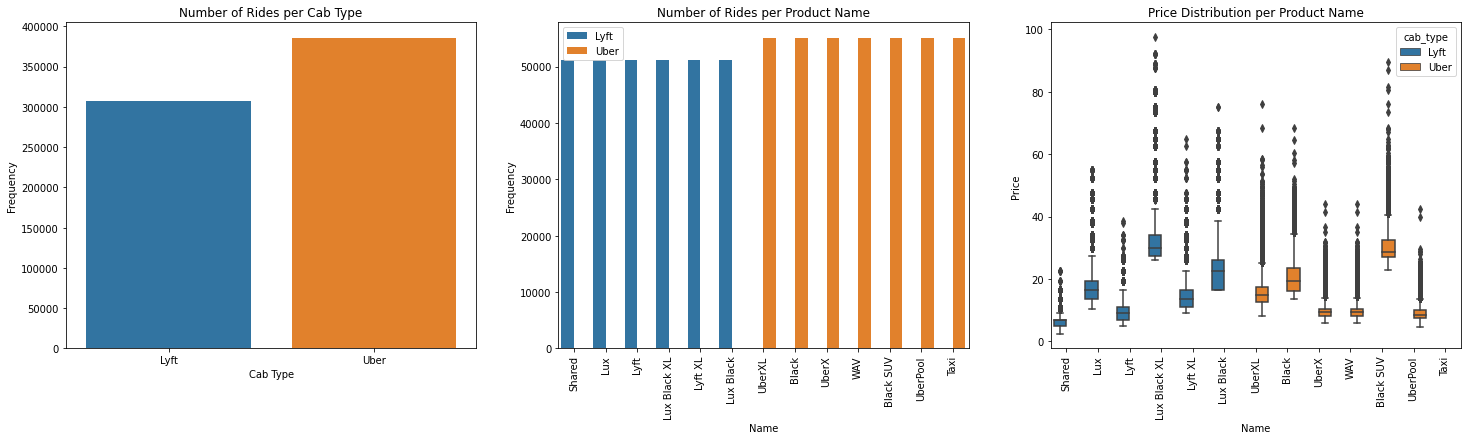

In [253]:
#memeriksa dengat plot (Cab_type,name,price)
plt.figure(figsize=(25,6))
plt.subplot(1, 3, 1)
sns.countplot(x='cab_type', data=data)
plt.title('Number of Rides per Cab Type')
plt.xlabel('Cab Type')
plt.ylabel('Frequency')
plt.subplot(1, 3, 2)
sns.countplot(x='name', data=data, hue='cab_type')
plt.title('Number of Rides per Product Name')
plt.xlabel('Name')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.subplot(1, 3, 3)
sns.boxplot(x='name', y='price', data=data, hue='cab_type')
plt.title('Price Distribution per Product Name')
plt.xlabel('Name')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

uber lebih banyak dipakai di america, dan dilihat dari distribusi name price beda2 sesuai kategori,dan dari boxplot ada perbedaan harga sesuai name

In [254]:
df_taxi=data[data['name']=='Taxi']
df_taxi['price']

18       NaN
31       NaN
40       NaN
60       NaN
69       NaN
          ..
693025   NaN
693047   NaN
693049   NaN
693060   NaN
693068   NaN
Name: price, Length: 55095, dtype: float64

Cek category TAXI missing value price

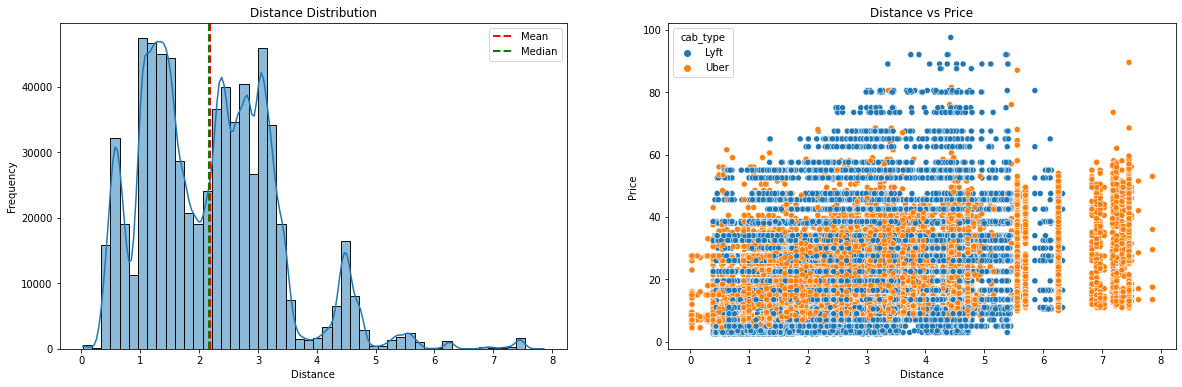

Skewness: 0.8343950077972692
Mean: 2.1894297553930255
Median: 2.16


In [255]:
plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
sns.histplot(x='distance', data=data, bins=50, kde=True)
plt.axvline(data.distance.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(data.distance.median(), color='green', linestyle='dashed', linewidth=2, label='Median')
plt.title('Distance Distribution')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.legend()
plt.subplot(1, 2, 2)
sns.scatterplot(x='distance', y='price', data=data, hue='cab_type')
plt.title('Distance vs Price')
plt.xlabel('Distance')
plt.ylabel('Price')
plt.show()
print(f'Skewness: {data.distance.skew()}')
print(f'Mean: {data.distance.mean()}')
print(f'Median: {data.distance.median()}')

Distribusi dari kolom distance ini jika dilihat dari nilai skewness dan bentuk dari histogramnya tergolong distribusi Right-Skewed walaupun mean dan mediannya berdekatan hal ini mungkin terjadi karena terdapat outlier pada kolom ini. Dari scatter plot juga dapat dilihat bahwa kolom distance dan kolom price ini memiliki Positive Correlation dimana semakin jauh distance maka price akan semakin besar.

Dari scatter plot juga dapat diketahui bahwa tarif yang ditawarkan oleh Uber ini lebih murah dibandingkan Lyft.

In [256]:
data.groupby("short_summary")[["price"]].aggregate([min,max,sum,'mean'])

price                             
                     min   max         sum       mean
short_summary                                        
 Clear               2.5  97.5  1323137.35  16.486460
 Drizzle             2.5  80.0   110974.50  16.501784
 Foggy               2.5  62.5   137157.00  16.540883
 Light Rain          2.5  80.5   836146.00  16.561282
 Mostly Cloudy       2.5  92.0  2233658.63  16.594419
 Overcast            2.5  92.0  3330651.85  16.535116
 Partly Cloudy       2.5  92.0  1940325.85  16.552009
 Possible Drizzle    2.5  75.0   283084.35  16.481390
 Rain                2.5  80.5   360257.45  16.539987

melihat korelasi short_summary dan price dengan grouping, sepertinnya ada korelasi tetapi tidak grouping dengan distance

In [257]:
data.groupby("distance")[["price"]].aggregate([min,max,sum,'mean'])

price                          
           min   max      sum       mean
distance                                
0.02       5.5  27.5    711.0  11.850000
0.03       4.5  27.5   2380.0  11.666667
0.04       7.0  27.5   1008.0  12.000000
0.12       7.0  27.5    648.0  12.000000
0.17       4.5  27.0    347.5  11.583333
...        ...   ...      ...        ...
7.45      12.0  46.0    156.0  26.000000
7.46      11.0  89.5  36955.5  27.374444
7.50      13.0  56.0    512.5  28.472222
7.62      13.5  51.5    169.5  28.250000
7.86      13.5  53.0    167.0  27.833333

[549 rows x 4 columns]

dari sini distance sudah jelas korelasi dengan price

In [258]:
# Creating a subset
df_subset = data.loc[:, ['source', 'distance', 'long_summary', 'price']]
# Group by multiple categories
df_subset.groupby(['distance', 'long_summary']).mean()

price
distance long_summary                                                 
0.02      Foggy in the morning.                               7.300000
          Light rain in the morning and overnight.           10.300000
          Light rain in the morning.                         14.500000
          Light rain until evening.                           9.000000
          Mostly cloudy throughout the day.                  11.613636
...                                                                ...
7.50      Rain until morning, starting again in the even...        NaN
7.62      Mostly cloudy throughout the day.                  19.666667
          Partly cloudy throughout the day.                  36.833333
7.86      Light rain in the morning.                         26.750000
          Mostly cloudy throughout the day.                  28.375000

[4924 rows x 1 columns]

terlihat distance 0.02 ada perbedaan harga dengan long_summary

In [259]:
# Creating a subset
df_subsettem = data.loc[:, ['temperature', 'distance', 'temperatureHigh', 'price','short_summary','name']]
# Group by multiple categories
df_subsettem.groupby(['distance', 'temperature','short_summary','name']).mean()

temperatureHigh  price
distance temperature short_summary   name                             
0.02     27.93        Partly Cloudy  UberPool             46.61    7.5
         30.04        Clear          Black                42.58   15.0
                                     Black SUV            42.58   27.5
                                     UberX                42.58    6.5
         30.26        Clear          Black SUV            35.97   27.5
...                                                         ...    ...
7.86     45.18        Overcast       Black SUV            54.47   53.0
                                     Taxi                 54.47    NaN
                                     UberPool             54.47   13.5
                                     UberXL               54.47   29.5
                                     WAV                  54.47   17.5

[430859 rows x 2 columns]

mencoba melihat dengan temparature, dan terihat tidak ada pola yang terlihat untuk ada kenaikan harga atau tidak

<h1>Price</h1>

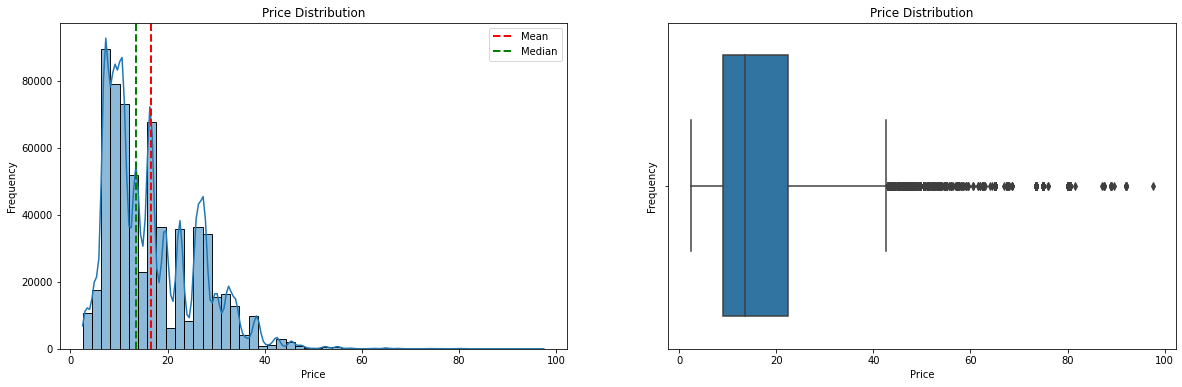

Skewness: 1.0457470560899256
Mean: 16.545125490614065
Median: 13.5


In [260]:
plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
sns.histplot(x='price', data=data, bins=50, kde=True)
plt.axvline(data.price.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(data.price.median(), color='green', linestyle='dashed', linewidth=2, label='Median')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.subplot(1, 2, 2)
sns.boxplot(x='price', data=data)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()
print(f'Skewness: {data.price.skew()}')
print(f'Mean: {data.price.mean()}')
print(f'Median: {data.price.median()}')

Kolom price ini memiliki distribusi yang Highly Skewed karena nilai skewnessnya lebih dari 1 dengan bentuknya distribusi yang Right-Skewed. Dari boxplot ini juga dapat dilihat bahwa kolom ini memiliki beberapa outlier.

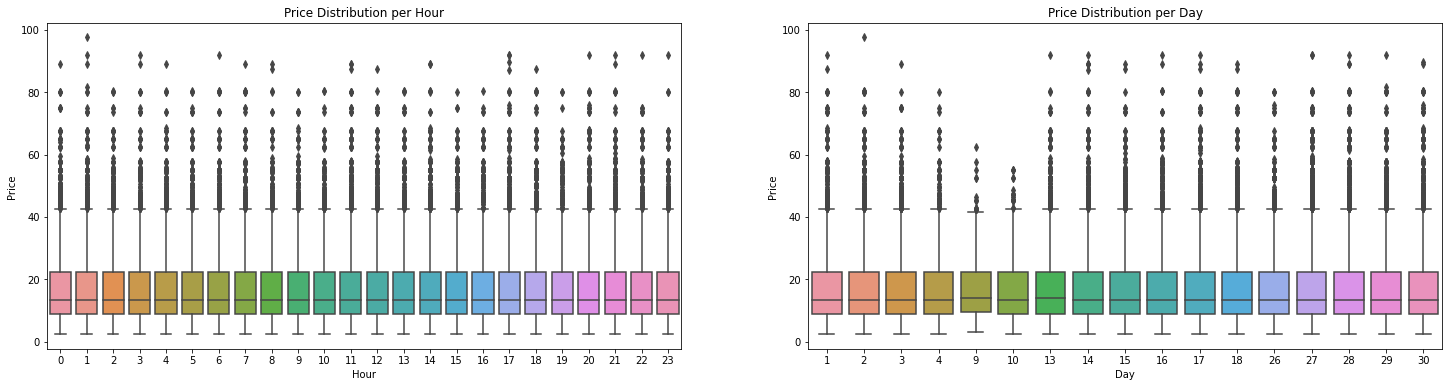

In [261]:
#mengecek dengan box plot
plt.figure(figsize=(25,6))
plt.subplot(1, 2, 1)
sns.boxplot(x='hour', y='price', data=data)
plt.title('Price Distribution per Hour')
plt.xlabel('Hour')
plt.ylabel('Price')
plt.subplot(1, 2, 2)
sns.boxplot(x='day', y='price', data=data)
plt.title('Price Distribution per Day')
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()

Dari boxplot ini dapat diketahui bahwa tidak ada hubungan linear antara kolom price dengan kolom hour dan day, maka nantinya kolom-kolom tersebut tidak akan digunakan sebagai feature.

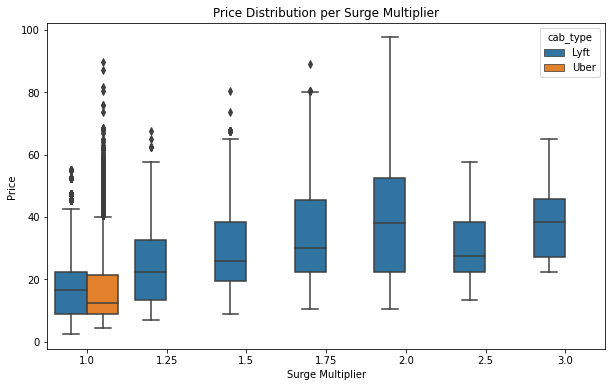

In [262]:
#mengecek dengan box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='surge_multiplier', y='price', data=data, hue='cab_type')
plt.title('Price Distribution per Surge Multiplier')
plt.xlabel('Surge Multiplier')
plt.ylabel('Price')
plt.show()

Dari boxplot ini dapat dilihat bahwa dengan menikatnya surge_multiplier maka price pun ikut menigkat, ini menunjukan adanya hubungan antara kolom-kolom tersebut.

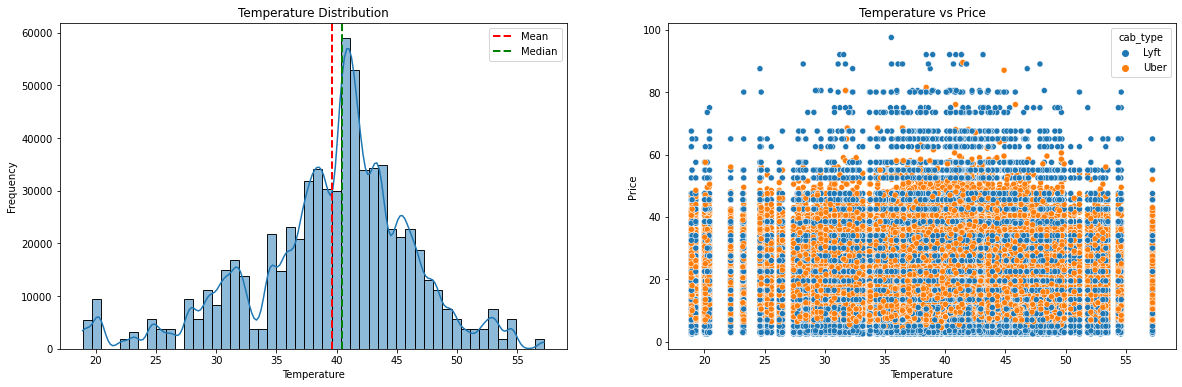

Skewness: -0.6090401295944383
Mean: 39.584388468136744
Median: 40.49


In [263]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.histplot(x='temperature', data=data, bins=50, kde=True)
plt.axvline(data.temperature.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(data.temperature.median(), color='green', linestyle='dashed', linewidth=2, label='Median')
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend()
plt.subplot(1, 2, 2)
sns.scatterplot(x='temperature', y='price', data=data, hue='cab_type')
plt.title('Temperature vs Price')
plt.xlabel('Temperature')
plt.ylabel('Price')
plt.show()
print(f'Skewness: {data.temperature.skew()}')
print(f'Mean: {data.temperature.mean()}')
print(f'Median: {data.temperature.median()}')

Distribusi dari temperature ini cenderung memiliki distribusi yang Normal walaupun jika dilihat dari nilai skewnessnya sedikit Left-Skewed dengan rata-ratanya sekitar 39.58°F ini mungkin karena dataset yang digunakan hanya mendata perjalanan pada bulan november hingga desember di USA yang mana disana sedang musim dingin.

Namun, dari scatter plot tidak menunjukan bahwa adanya hubungan antara temperature dengan price.

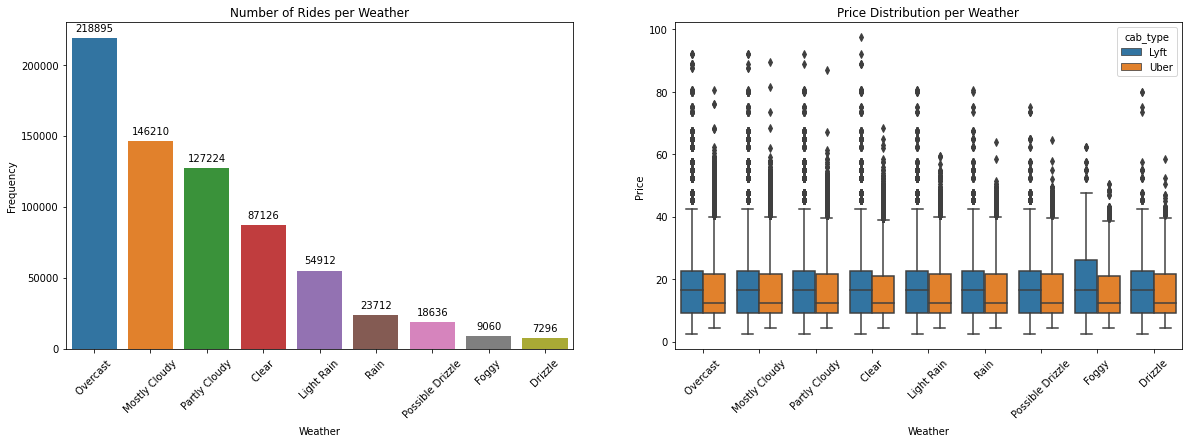

In [264]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
weather = sns.countplot(x='short_summary', data=data, order=data.short_summary.value_counts().index)
for p in weather.patches:
    weather.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Number of Rides per Weather')
plt.xlabel('Weather')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.subplot(1, 2, 2)
sns.boxplot(x='short_summary', y='price', data=data, hue='cab_type', order=data.short_summary.value_counts().index)
plt.title('Price Distribution per Weather')
plt.xlabel('Weather')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

Karena di USA sedang musim dingin, maka pada kolom short_summary atau cuaca ini banyak mencatat saat cuaca mendung. Namun, sepertinya cuaca juga tidak mempengaruhi price dari sebuah perjalanan jika dilihat dari box plot.

In [265]:
#Correlation Between Numeric Columns
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
timestamp,1.000000,-0.028004,-0.341292,0.771182,0.000808,0.003553,0.000572,0.168130,-0.136802,-0.248748,-0.226264,-0.179958,-0.147596,-0.168024,-0.066171,0.005706,0.998842,0.158993,-0.228125,0.999332,-0.366859,0.999175,-0.215363,0.999313,-0.401999,0.999203,-0.265444,0.533025,-0.133526,-0.081699,-0.025708,0.158993,0.196518,0.999372,0.999372,-0.846203,-0.211700,0.999364,-0.306971,0.998194,-0.186328,0.999290,-0.378346,0.998286,-0.157748,0.999276
hour,-0.028004,1.000000,0.066090,-0.079379,0.000561,0.002280,-0.000077,0.019493,-0.006295,0.218769,0.198190,-0.233349,-0.129725,-0.275762,0.072778,0.077308,-0.028047,0.174129,0.005172,-0.027838,0.015326,-0.026797,0.005513,-0.027997,0.016005,-0.026970,0.004839,-0.067366,0.036089,0.026525,0.330209,0.174129,0.034164,-0.027537,-0.027535,0.020483,0.019940,-0.027518,0.015513,-0.027027,0.002958,-0.027990,0.015820,-0.027704,0.002897,-0.027785
day,-0.341292,0.066090,1.000000,-0.861306,-0.000722,-0.000627,0.001389,0.006838,0.078690,-0.084116,-0.223545,0.091664,0.030903,-0.093340,0.440502,0.402637,-0.336417,0.104992,-0.283561,-0.343118,-0.088320,-0.333558,-0.398183,-0.343291,-0.192984,-0.335504,-0.101582,-0.444635,0.092167,-0.041190,-0.011885,0.104992,0.377057,-0.341068,-0.341012,-0.007260,0.145568,-0.341198,0.038076,-0.333990,-0.304870,-0.344532,-0.019940,-0.335043,-0.444445,-0.344411
month,0.771182,-0.079379,-0.861306,1.000000,0.000913,0.002298,-0.000628,0.085791,-0.126912,-0.081774,0.024983,-0.154531,-0.098031,-0.022256,-0.334803,-0.270494,0.767265,0.011493,0.068313,0.772053,-0.138732,0.765489,0.152651,0.772163,-0.086998,0.766822,-0.074794,0.589609,-0.135103,-0.016800,-0.012321,0.011493,-0.149333,0.770684,0.770646,-0.452469,-0.213054,0.770767,-0.191803,0.765255,0.105326,0.772989,-0.191153,0.766031,0.215076,0.772896
price,0.000808,0.000561,-0.000722,0.000913,1.000000,0.345061,0.240458,0.002088,-0.001417,-0.000084,-0.000193,0.000166,-0.000243,-0.001238,0.000990,0.001218,0.000851,0.001497,-0.000516,0.000759,0.000182,0.000754,-0.000261,0.000741,0.000831,0.000761,-0.000615,0.000866,-0.001382,0.000883,-0.000424,0.001497,0.000460,0.000760,0.000760,-0.001602,0.001114,0.000763,-0.000428,0.000769,-0.000550,0.000766,-0.000580,0.000814,-0.000290,0.000746
distance,0.003553,0.002280,-0.000627,0.002298,0.345061,1.000000,0.024769,0.000819,-0.000293,-0.002884,-0.003116,-0.000256,0.000371,-0.003901,0.002277,0.001364,0.003618,0.004092,-0.004154,0.003604,-0.002146,0.003556,-0.004098,0.003585,-0.001501,0.003583,-0.004078,0.003490,-0.002146,-0.000905,0.002318,0.004092,0.001467,0.003556,0.003556,-0.004594,0.000648,0.003562,-0.003396,0.003428,-0.004191,0.003580,-0.003937,0.003526,-0.004238,0.003584
surge_multiplier,0.000572,-0.000077,0.001389,-0.000628,0.240458,0.024769,1.000000,0.001375,-0.001829,-0.001572,-0.002532,-0.001530,-0.002769,-0.001676,0.002511,0.002093,0.000439,0.001714,-0.001897,0.000520,-0.002601,0.000573,-0.002041,0.000520,-0.002994,0.000551,-0.001849,-0.003003,0.002167,-0.002103,-0.002422,0.001714,0.003324,0.000544,0.000544,-0.000150,-0.000101,0.000544,-0.000724,0.000554,-0.001951,0.000522,-0.001304,0.000464,-0.002154,0.000519
latitude,0.168130,0.019493,0.006838,0.085791,0.002088,0.000819,0.001375,1.000000,-0.531259,-0.098604,-0.067098,-0.074181,-0.071275,-0.117481,-0.097139,0.024309,0.172625,0.124166,-0.115307,0.173702,-0.032133,0.171193,-0.092167,0

<p>dilihat dari data numerik paling tinggi di distance dan surge_multiplier

In [266]:
#membuat korelasi dengan C-map
cat_corr = pd.get_dummies(data[['price', 'source', 'destination', 'cab_type', 'name', 'short_summary']]).corr()
cat_corr.style.background_gradient(cmap='coolwarm')

,price,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_Taxi,name_UberPool,name_UberX,name_UberXL,name_WAV,short_summary_ Clear,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain
price,1.000000,-0.016101,-0.028396,0.074634,0.059317,0.053468,-0.095924,-0.045006,-0.005821,0.043847,-0.028216,0.001678,-0.014092,-0.010834,-0.009565,0.077515,0.051780,0.049051,-0.074040,-0.049891,0.008360,0.041467,-0.055504,-0.018458,-0.010306,0.083385,-0.083385,0.131185,0.453096,0.038857,0.206544,0.500057,-0.219756,-0.039163,-0.333235,nan,-0.256930,-0.223551,-0.028587,-0.223557,-0.002387,-0.000480,-0.000052,0.000508,0.002734,-0.000729,0.000350,-0.001137,-0.000104
source_Back Bay,-0.016101,1.000000,-0.090637,-0.090947,-0.090941,-0.091882,-0.090923,-0.090946,-0.090391,-0.090940,-0.090935,-0.090989,-0.090773,-0.090961,-0.090637,0.087202,0.087860,-0.091877,0.090412,0.102137,-0.090392,0.090036,0.087972,-0.090976,-0.090785,0.000228,-0.000228,-0.000060,-0.000062,0.000075,0.000075,0.000075,0.000075,0.000075,0.000058,-0.000060,-0.000054,-0.000059,-0.000062,-0.000062,-0.000898,0.001106,0.000989,0.000447,-0.001110,0.002429,-0.002098,-0.000257,0.000711
source_Beacon Hill,-0.028396,-0.090637,1.000000,-0.090613,-0.090607,-0.091545,-0.090589,-0.090612,-0.090059,-0.090606,-0.090601,-0.090655,-0.090440,-0.090626,-0.090303,0.084050,0.088119,-0.091540,0.090565,0.099543,-0.090060,0.092821,0.088516,-0.090642,-0.090451,0.000034,-0.000034,-0.000004,-0.000005,0.000010,0.000010,0.000010,0.000010,0.000010,0.000013,-0.000023,-0.000017,-0.000002,-0.000005,-0.000005,-0.000823,-0.001297,0.004775,0.001453,0.001184,-0.002092,0.000484,-0.001602,0.000175
source_Boston University,0.074634,-0.090947,-0.090613,1.000000,-0.090917,-0.091858,-0.090899,-0.090922,-0.090367,-0.090916,-0.090911,-0.090965,-0.090749,0.087229,0.083917,-0.090923,-0.090917,0.090002,-0.090923,-0.090916,0.089587,-0.090915,-0.090910,0.097233,0.097547,-0.000010,0.000010,0.000002,0.000000,-0.000004,-0.000004,-0.000004,-0.000004,-0.000004,-0.000000,0.000002,0.000009,0.000004,0.000000,0.000000,-0.000213,0.000047,-0.003590,-0.001327,0.002087,-0.001570,0.000749,-0.003783,0.005678
source_Fenway,0.059317,-0.090941,-0.090607,-0.090917,1.000000,-0.091852,-0.090893,-0.090916,-0.090361,-0.090910,-0.090905,-0.090959,-0.090743,0.088019,0.088119,-0.090917,-0.090911,0.089456,-0.090917,-0.090910,0.094747,-0.090909,-0.090904,0.083673,0.101517,0.000023,-0.000023,-0.000006,-0.000008,0.000007,0.000007,0.000007,0.000007,0.000007,0.000010,-0.000006,-0.000000,-0.000005,-0.000008,-0.000008,0.000573,0.000716,-0.000460,-0.004389,-0.001323,0.000487,0.003436,-0.001034,0.000688
source_Financial District,0.053468,-0.091882,-0.091545,-0.091858,-0.091852,1.000000,-0.091834,-0.091857,-0.091297,-0.091851,-0.091846,-0.091901,-0.091683,-0.091872,-0.091545,0.089988,0.089704,-0.092798,0.097890,0.083040,-0.091298,0.088436,0.102027,-0.091888,-0.091694,0.001368,-0.001368,-0.000359,-0.000361,0.000436,0.000436,0.000436,0.000436,0.000436,0.000419,-0.000359,-0.000353,-0.000358,-0.000361,-0.000361,-0.000327,-0.001805,-0.000474,0.005668,0.001682,-0.001314,-0.002047,-0.000371,-0.002240
source_Haymarket Square,-0.095924,-0.090923,-0.090589,-0.090899,-0.090893,-0.091834,1.00

korelasi kategori paling tinggi di name

<h1>notes:colomn model yang peneliti pakai nanti dari hasil eda</h1>
<li>numeric:distance dan surge_multiplier</li>
<li>Kategori:name</li>

# 5 - Data Preprocessing

## Get Data for Model Inference

In [267]:
# Get Data Inference
inference = data.sample(10, random_state=23)

# Remove Data Inference from main dataframe
data = data.drop(inference.index)

inference

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
305558,5ccbd41a-2d48-4f11-8bf9-a3d231308530,1.543882e+09,0,4,12,2018-12-04 00:13:02,America/New_York,Northeastern University,Financial District,Lyft,...,0.0004,1543852800,42.86,1543896000,57.42,1543852800,39.73,1543896000,56.75,1543852800
19142,dac522c6-470c-4611-a562-d3e712fb10f8,1.543436e+09,20,28,11,2018-11-28 20:17:09,America/New_York,Theatre District,Haymarket Square,Uber,...,0.0000,1543420800,33.70,1543399200,42.57,1543438800,29.94,1543399200,36.55,1543438800
274878,73b260d3-0499-4208-9e56-09d6854c8ebb,1.544947e+09,7,16,12,2018-12-16 07:50:05,America/New_York,Beacon Hill,North End,Uber,...,0.1261,1544979600,39.07,1544954400,43.70,1544990400,33.64,1545019200,38.29,1544986800
466719,7e6e4773-d6e0-46d4-9f6f-bcb814567b74,1.544761e+09,4,14,12,2018-12-14 04:20:13,America/New_York,Theatre District,North End,Uber,...,0.0001,1544716800,18.24,1544688000,33.96,1544731200,13.72,1544688000,32.95,1544734800
343383,00d69a4b-77b7-434a-b209-1d176e72831e,1.543885e+09,0,4,12,2018-12-04 00:53:03,America/New_York,Boston University,West End,Uber,...,0.0004,1543852800,42.86,1543896000,57.42,1543852800,39.73,1543896000,56.75,1543852800
19296,ad0cc1ac-9d50-4ace-aa3f-82950340dee9,1.544990e+09,19,16,12,2018-12-16 19:55:11,America/New_York,North Station,Northeastern University,Lyft,...,0.1246,1544979600,38.88,1544954400,43.74,1544990400,33.68,1545019200,38.36,1544986800
10622,a640ba0c-d725-4a65-bf52-bc7afb81d173,1.543583e+09,13,30,11,2018-11-30 13:02:58,America/New_York,Theatre District,Boston University,Uber,...,0.0003,1543593600,28.79,1543579200,42.52,1543600800,26.41,1543575600,40.53,1543611600
499323,ba191871-8eb0-410b-8417-c3280892315f,1.544695e+09,9,13,12,2018-12-13 09:55:03,America/New_York,Beacon Hill,Northeastern University,Lyft,...,0.0001,1544716800,18.19,1544688000,34.02,1544731200,13.67,1544688000,33.04,1544734800
2982,08ef6d45-0462-4843-9613-496516fc6a34,1.543554e+09,5,30,11,2018-11-30 05:03:02,America/New_York,North End,West End,Uber,...,0.0003,1543593600,28.78,1543579200,42.64,1543600800,26.35,1543575600,40.61,1543611600
663247,5783d57e-a285-41c5-a090-f9b9959b2f32,1.544726e+09,18,13,12,2018-12-13 18:40:09,America/New_York,Financial District,Northeastern University,Uber,...,0.0001,1544720400,17.85,1544688000,33.78,1544731200,13.73,1544688000,33.11,1544731200


## Split Data
Membuat training set dan test set dengan perbandingan 8:2, 

dimana:

80% data menjadi training set
20% data menjadi test set

In [268]:
X_train, X_test = train_test_split(data, test_size=0.2, random_state=17)

In [269]:
X_train

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
190506,a4ea8f59-7944-4669-a9b8-eb45486a0bf0,1.543422e+09,16,28,11,2018-11-28 16:26:08,America/New_York,Back Bay,North End,Lyft,...,0.0000,1543420800,33.75,1543399200,42.60,1543438800,29.97,1543399200,36.58,1543438800
119152,b879558b-0ad7-4185-9514-0648731f1533,1.543354e+09,21,27,11,2018-11-27 21:24:23,America/New_York,West End,Boston University,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
603657,f224360a-b6a8-41b8-9f06-c2a3f37e220f,1.543619e+09,23,30,11,2018-11-30 23:08:09,America/New_York,West End,Northeastern University,Uber,...,0.0000,1543593600,28.90,1543579200,42.13,1543600800,26.20,1543575600,40.95,1543608000
269189,5ab17cae-0371-4dec-92a6-66f0e1d58976,1.543354e+09,21,27,11,2018-11-27 21:18:22,America/New_York,Theatre District,Fenway,Uber,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
632633,47b3edba-fdd1-4f9e-9950-710846f03f78,1.543565e+09,7,30,11,2018-11-30 07:57:59,America/New_York,South Station,West End,Uber,...,0.0003,1543593600,28.78,1543579200,42.64,1543600800,26.35,1543575600,40.61,1543611600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516383,b28e279a-0ed4-4d8c-9495-e041f4ae701b,1.544398e+09,23,9,12,2018-12-09 23:18:25,America/New_York,Boston University,West End,Uber,...,0.0003,1544374800,15.95,1544353200,35.97,1544378400,14.08,1544356800,29.83,1544378400
125684,236b359d-fbb2-4fa2-bb0a-29a6dc98610d,1.545151e+09,16,18,12,2018-12-18 16:30:03,America/New_York,Theatre District,Boston University,Lyft,...,0.0028,1545152400,23.26,1545192000,38.11,1545109200,11.99,1545134400,32.05,1545109200
491934,594a0cb5-edce-484d-9c91-a19659556e36,1.543310e+09,9,27,11,2018-11-27 09:09:22,America/New_York,Haymarket Square,Financial District,Lyft,...,0.1425,1543338000,36.34,1543377600,46.91,1543320000,32.43,1543377600,44.01,1543320000
297108,c2dde497-2b16-4fee-853c-cb6a09e413f7,1.543835e+09,10,3,12,2018-12-03 10:58:07,America/New_York,South Station,West End,Lyft,...,0.0007,1543852800,42.96,1543896000,57.87,1543852800,39.41,1543896000,57.20,1543852800


df_train ini memiliki 554448 baris dengan 57 kolom.

In [270]:
X_test

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
638444,911f26ab-cdd4-4f96-b593-4c890934c4e7,1.543506e+09,15,29,11,2018-11-29 15:33:06,America/New_York,North Station,North End,Uber,...,0.0000,1543510800,35.12,1543550400,44.76,1543510800,30.85,1543550400,38.44,1543510800
545825,5aac8f38-e587-46a8-94f8-9d743e3831fa,1.543456e+09,1,29,11,2018-11-29 01:51:43,America/New_York,Beacon Hill,Fenway,Lyft,...,0.0000,1543420800,33.85,1543399200,42.61,1543438800,30.03,1543399200,36.57,1543438800
403364,c3ca9f26-aa0c-427a-bd21-4e6d72cab304,1.544830e+09,23,14,12,2018-12-14 23:20:12,America/New_York,North End,Beacon Hill,Uber,...,0.0000,1544806800,26.51,1544788800,46.70,1544814000,27.16,1544788800,44.06,1544817600
548913,245496ca-adcf-4ca1-b0a8-2039b881a153,1.544737e+09,21,13,12,2018-12-13 21:40:10,America/New_York,North Station,South Station,Uber,...,0.0001,1544720400,17.85,1544688000,33.78,1544731200,13.73,1544688000,33.11,1544731200
120947,8bf4f065-6d9e-45cb-bba3-61de74cc36a8,1.543425e+09,17,28,11,2018-11-28 17:08:08,America/New_York,North Station,South Station,Lyft,...,0.0000,1543420800,33.70,1543399200,42.57,1543438800,29.94,1543399200,36.55,1543438800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546997,43fa3c84-a9cd-42bd-ae60-6b67b6e7ffe0,1.544791e+09,12,14,12,2018-12-14 12:30:09,America/New_York,North End,Theatre District,Lyft,...,0.0000,1544806800,27.11,1544781600,46.61,1544814000,27.76,1544781600,43.85,1544817600
470075,857da10a-bb88-487f-8429-09a8ca0dc7d1,1.543436e+09,20,28,11,2018-11-28 20:05:08,America/New_York,North Station,Boston University,Uber,...,0.0000,1543420800,33.70,1543399200,42.57,1543438800,29.94,1543399200,36.55,1543438800
466307,7e2dedae-fcda-4d40-b7d9-f862560419dd,1.544955e+09,10,16,12,2018-12-16 10:15:11,America/New_York,Northeastern University,Financial District,Lyft,...,0.1252,1544979600,39.22,1544954400,43.83,1544990400,33.98,1545019200,38.38,1544986800
268666,f8c91c1f-1c48-4287-bd17-355227684b31,1.544684e+09,6,13,12,2018-12-13 06:50:10,America/New_York,Northeastern University,Financial District,Uber,...,0.0001,1544716800,18.05,1544688000,33.92,1544731200,13.60,1544688000,32.95,1544734800


isi dari df_test 20% dari data

##Missing Value Handling

karena ada missing value di target, jadi di handling sebelum outlier

In [271]:
X_train.isna().sum() #cek missing value

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          44246
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [272]:
X_train = X_train.dropna() #drop Missing Value

In [273]:
X_train.isna().any() #cek missing value

id                             False
timestamp                      False
hour                           False
day                            False
month                          False
datetime                       False
timezone                       False
source                         False
destination                    False
cab_type                       False
product_id                     False
name                           False
price                          False
distance                       False
surge_multiplier               False
latitude                       False
longitude                      False
temperature                    False
apparentTemperature            False
short_summary                  False
long_summary                   False
precipIntensity                False
precipProbability              False
humidity                       False
windSpeed                      False
windGust                       False
windGustTime                   False
v

In [274]:
X_test.isna().sum() #cek Missing value x_tes

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          10849
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [275]:
X_test= X_test.dropna() #drop nam di x-test 

In [276]:
X_test.isna().any() #check apaka masih ada missing value

id                             False
timestamp                      False
hour                           False
day                            False
month                          False
datetime                       False
timezone                       False
source                         False
destination                    False
cab_type                       False
product_id                     False
name                           False
price                          False
distance                       False
surge_multiplier               False
latitude                       False
longitude                      False
temperature                    False
apparentTemperature            False
short_summary                  False
long_summary                   False
precipIntensity                False
precipProbability              False
humidity                       False
windSpeed                      False
windGust                       False
windGustTime                   False
v

## Handling Outlier




###Handling Outlier X_train

In [277]:
# Function to create histogram and boxplot.
# This functions takes a dataframe (df) and the variable of interest as arguments.

def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

<p>buat fungsi untuk buat histogram dan boxplot

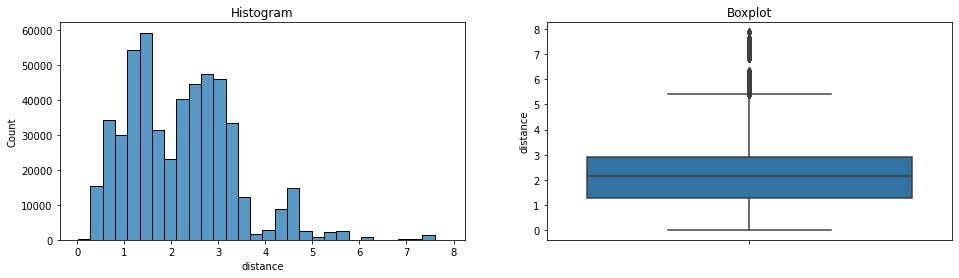


Skewness Value :  0.8160148700933512


In [278]:
#cek outlier di distance

diagnostic_plots(X_train,'distance')
print('\nSkewness Value : ', X_train['distance'].skew())

ada distribusi tidak normal <b>right skew</b> dan terliat ada outlier dari 6 sampai 7 koma

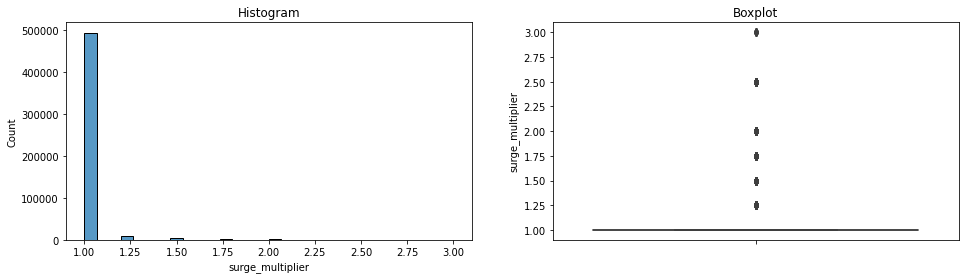


Skewness Value :  7.975655502961631


In [279]:
diagnostic_plots(X_train,'surge_multiplier')
print('\nSkewness Value : ', X_train['surge_multiplier'].skew())

terlihat ada outlier di angka 1, kemungkinan ini yang tadi peneliti cek di EDA, uber tidak memakai surge_multiplier

In [280]:
# Function to find upper and lower boundaries for normally distributed variables
# Calculate the boundaries outside which sit the outliers for a Gaussian distribution

def find_normal_boundaries(data, variable):
    upper_boundary = data[variable].mean() + 3 * data[variable].std()
    lower_boundary = data[variable].mean() - 3 * data[variable].std()

    return upper_boundary, lower_boundary

In [281]:
# calculate boundaries for distance
upper_boundary, lower_boundary = find_normal_boundaries(X_train, 'distance')
upper_boundary, lower_boundary

(5.595084064762629, -1.2171032258008037)

<p>ada jarak -1.2 sepertinya tidak mungkin karena harusnya jarak lebih dari 0</p>

In [282]:
# calculate boundaries for surge_multiplier
upper_boundary, lower_boundary = find_normal_boundaries(X_train, 'surge_multiplier')
upper_boundary, lower_boundary

(1.300914086886118, 0.7291524357852945)

<li>Upper  1.300914086886118, 
<li>Lowwer 0.7291524357852945

####Outlier detection for skewed variables

In [283]:
# Function to find upper and lower boundaries for skewed distributed variables
# Let's calculate the boundaries outside which sit the outliers for skewed distributions
# Distance passed as an argument, gives us the option to estimate 1.5 times or 3 times the IQR to calculate the boundaries.

def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [284]:
# Looking for outliers, using the interquantile proximity rule IQR * 1.5,

upper_boundary, lower_boundary = find_skewed_boundaries(X_train, 'distance', 1.5)
upper_boundary, lower_boundary

(5.405, -1.195)

<li>Upper :5.405, 
<li>Lowwer:-1.195

In [285]:
# Looking for outliers, using the interquantile proximity rule IQR * 1.5,

upper_boundary, lower_boundary = find_skewed_boundaries(X_train, 'surge_multiplier', 1.5)
upper_boundary, lower_boundary

(1.0, 1.0)

<li>Upper  :1.0 
<li>Lowwer :1.0)

####Trimming

In [286]:
# Function to create histogram and boxplot.
# Function takes a dataframe (df) and the variable of interest as arguments

def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

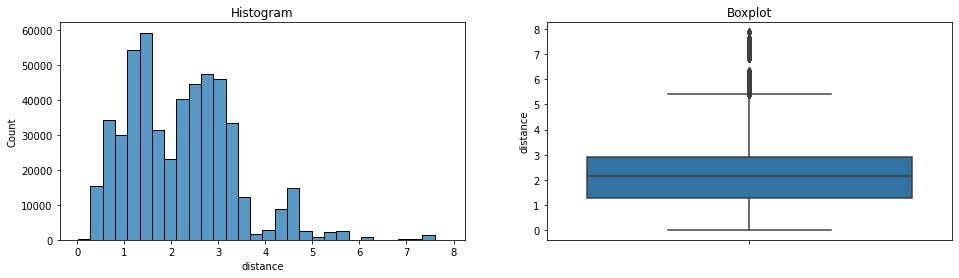

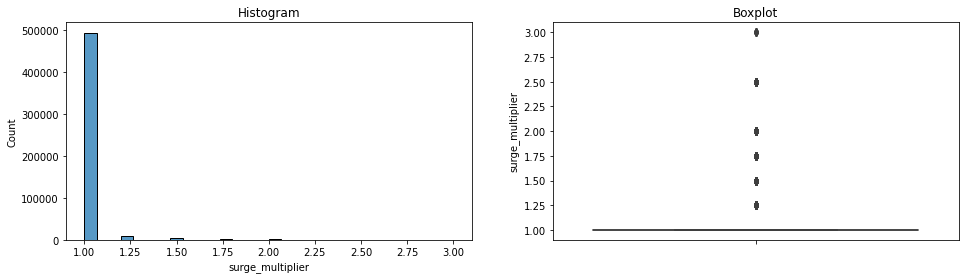

In [287]:
#memakai fungsi boxplot
diagnostic_plots(X_train, 'distance')
diagnostic_plots(X_train, 'surge_multiplier')


Tampilan distance dan surge_multiplier yang akan kita trim outliernnya

In [288]:
# Function to find upper and lower boundaries for skewed distributed variables
# Let's calculate the boundaries outside which sit the outliers for skewed distributions
# Distance passed as an argument, gives us the option to estimate 1.5 times or 3 times the IQR to calculate the boundaries.

def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [289]:
# Limits for `distance`
distance_upper_limit, distance_lower_limit = find_skewed_boundaries(X_train, 'distance', 1.5)
distance_upper_limit, distance_lower_limit

# Limits for `surge_multiplier`
surge_multiplier_upper_limit, surge_multiplier_lower_limit = find_skewed_boundaries(X_train, 'surge_multiplier', 1.5)
surge_multiplier_upper_limit, surge_multiplier_lower_limit



print('distance_upper_limit : ', distance_upper_limit)
print('distance_lower_limit : ', distance_lower_limit, '\n')
print('surge_multiplier_upper_limit : ', surge_multiplier_upper_limit)
print('surge_multiplier_lower_limit : ', surge_multiplier_lower_limit, '\n')


distance_upper_limit :  5.405
distance_lower_limit :  -1.195 

surge_multiplier_upper_limit :  1.0
surge_multiplier_lower_limit :  1.0 



mencari dengan IQR lower dan upper di kedua featured yang kita pilih

In [290]:
# Flag the outliers in category `distance `
outliers_distance = np.where(X_train['distance'] > distance_upper_limit, True,
                       np.where(X_train['distance'] < distance_lower_limit, True, False))

# Flag the outliers in category `surge_multiplier`
outliers_surge_multiplier = np.where(X_train['surge_multiplier'] > surge_multiplier_upper_limit, True,
                       np.where(X_train['surge_multiplier'] < surge_multiplier_lower_limit, True, False))

print(outliers_distance[:10])

[False False False False False False False False False False]


In [291]:
# Let's trimm the dataset

X_train_trimmed = X_train.loc[~(outliers_distance + outliers_surge_multiplier)]
print('Size dataset - Before trimming : ', X_train.shape)
print('Size dataset - After trimming  : ', X_train_trimmed.shape)

Size dataset - Before trimming :  (510202, 57)
Size dataset - After trimming  :  (487787, 57)


setelah dihapus outliers data tersisa Size dataset -
<li>Before trimming :  (510202, 57)
<li>After trimming  :  (487787, 57)

distance - Before Trimming


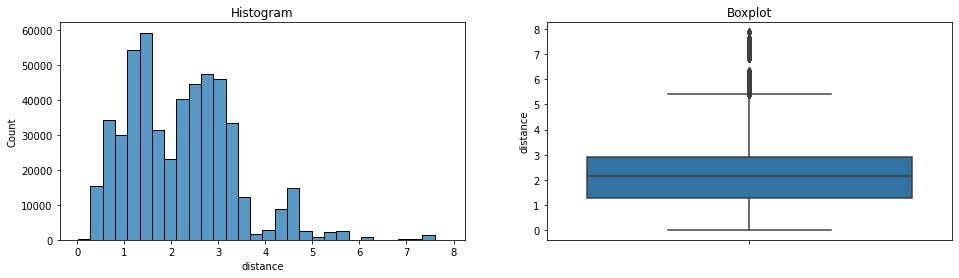


distance - After Trimming


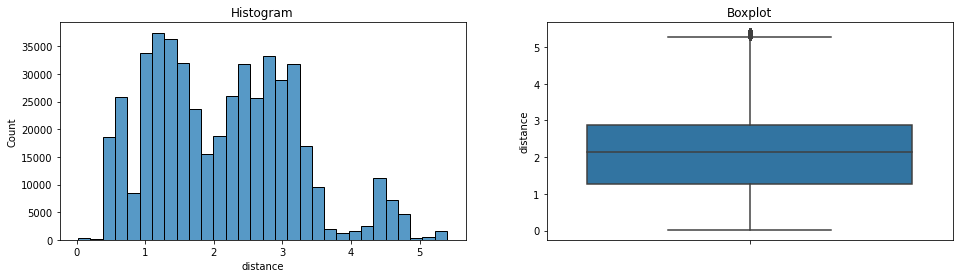


surge_multiplier - Before Trimming


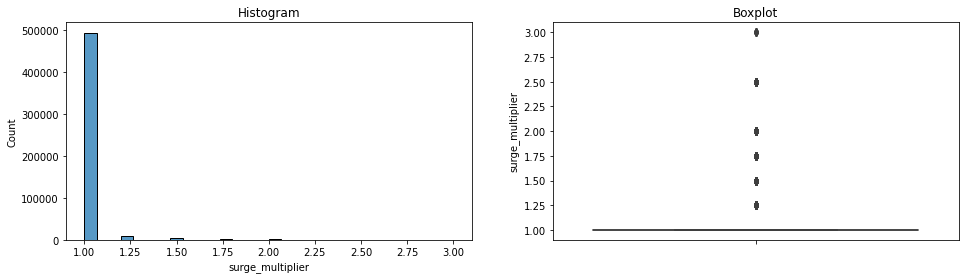


surge_multiplier - After Trimming


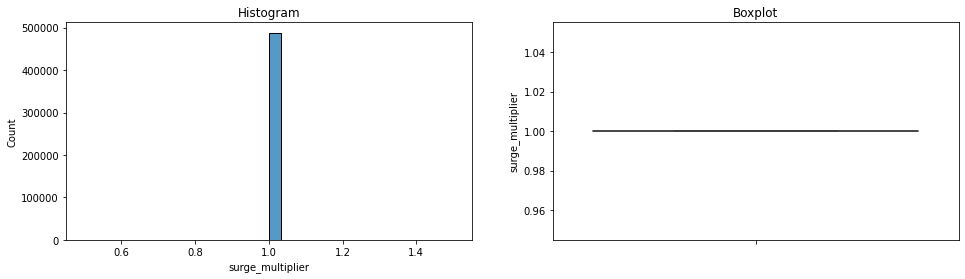

In [292]:
# Let's find outliers in `distance`, `outliers_surge_multiplier`

print('distance - Before Trimming')
diagnostic_plots(X_train, 'distance')
print('\ndistance - After Trimming')
diagnostic_plots(X_train_trimmed, 'distance')

print('\nsurge_multiplier - Before Trimming')
diagnostic_plots(X_train, 'surge_multiplier')
print('\nsurge_multiplier - After Trimming')
diagnostic_plots(X_train_trimmed, 'surge_multiplier')


sudah hilang outlier dari distance dan surge_multiplier, kenapa peneliti memakai trim, karena data outlier tidak masuk akal, yang dimana peneliti memutuskan untuk menghapus

## Feature Selection

###X_train

In [293]:
X = X_train_trimmed.drop('price', axis=1) # X adalah data noninference dikurangi colomn price
y = X_train_trimmed['price'] #Y adalah data noninference yang hanya menyisakan colomn price

In [294]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=17) #memakai fungsi dari sklearn train_test_split() dan data dari data noninference

print('Train Size data X noninference : ', X_train.shape)
print('Test Size  data X noninference : ', X_test.shape)
print('Train Size data Y noninference : ', y_train.shape)
print('Test Size  data Y noninference : ', y_test.shape)

Train Size data X noninference :  (365840, 56)
Test Size  data X noninference :  (121947, 56)
Train Size data Y noninference :  (365840,)
Test Size  data Y noninference :  (121947,)


Membuat Y_train dan Y_test

In [295]:
X_train = X_train[['name', 'distance', 'surge_multiplier']] # Features

X_test = X_test[['name', 'distance', 'surge_multiplier']] # Features


In [296]:

num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
cat_cols = X_train.select_dtypes(include=['object']).columns

print(f'Number of numerical columns: {len(num_cols)}')
print(f'Numerical columns: {num_cols}')
print(f'Number of categorical columns: {len(cat_cols)}')
print(f'Categorical columns: {cat_cols}')

X_train_num = X_train[num_cols] #definisikan x_train numerik ke variable x_train_num
X_train_cat = X_train[cat_cols]

X_test_num = X_test[num_cols]
X_test_cat = X_test[cat_cols]

Number of numerical columns: 2
Numerical columns: Index(['distance', 'surge_multiplier'], dtype='object')
Number of categorical columns: 1
Categorical columns: Index(['name'], dtype='object')


dipilih colomn name, distance dan surge_multiplier dari analisa eda heat map

## Feature Scaling

In [297]:
scaler = StandardScaler()

Karena satuan numerik beda maka menggunakan scaling StandardScaler.

In [298]:
X_train_num_scaled = scaler.fit_transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

Mengubah X_train_num_scaled dan X_test_num_scaled menjadi dataframe.

In [299]:
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns=num_cols)
X_test_num_scaled = pd.DataFrame(X_test_num_scaled, columns=num_cols)

X_train_num_scaled setelah dilakukan normalisasi (Scaling).

In [300]:
X_train_num_scaled.head()

,distance,surge_multiplier
0,0.183596,0.0
1,-1.646460,0.0
2,0.496507,0.0
3,1.236115,0.0
4,-0.973227,0.0


X_test_num_scaled setelah dilakukan normalisasi (Scaling).

In [301]:
X_test_num_scaled.head()

,distance,surge_multiplier
0,-0.537048,0.0
1,-0.328441,0.0
2,-0.205173,0.0
3,-0.774102,0.0
4,-0.916334,0.0


##Features Encoding

Pada bagian ini akan dilakukan encoding atau merubah variable kategori menjadi angka, karena kolom name adalah kategori nominal (tidak memiliki urutan) maka akan dilakukan encoding menggunakan OneHotEncoder.

In [302]:
encoder = OneHotEncoder()

In [303]:
X_train_cat_encoded = encoder.fit_transform(X_train_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)

Mengubah X_train_cat_encoded dan X_test_cat_encoded menjadi dataframe

In [304]:
X_train_cat_encoded = pd.DataFrame(X_train_cat_encoded.toarray(), columns=encoder.get_feature_names(cat_cols))
X_test_cat_encoded = pd.DataFrame(X_test_cat_encoded.toarray(), columns=encoder.get_feature_names(cat_cols))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


X_train_cat_encoded setelah dilakukan encoding.

In [305]:
X_train_cat_encoded.head()

,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


X_test_cat_encoded setelah dilakukan encoding.

In [306]:
X_test_cat_encoded.head()

,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


##Concate Features

Setelah feature numerik dan kategori dipisah untuk dilakukan Scaling dan Encoding, pada bagian ini akan menggabungkan kembali feature menjadi X_train dan X_test.

In [307]:
X_train = pd.concat([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_test = pd.concat([X_test_num_scaled, X_test_cat_encoded], axis=1)

Bentuk X_train setelah melalui feature scaling dan feature encoding.

In [308]:
X_train.head()

,distance,surge_multiplier,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,0.183596,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-1.646460,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.496507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.236115,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.973227,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Bentuk X_test setelah melalui feature scaling dan feature encoding.

In [309]:
X_test.head()

,distance,surge_multiplier,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,-0.537048,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.328441,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.205173,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.774102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-0.916334,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


#6-Model Definition

In [310]:
model = LinearRegression()
model_poly2 = make_pipeline(PolynomialFeatures(2), LinearRegression())
model_poly3 = make_pipeline(PolynomialFeatures(3), LinearRegression())

In [311]:
# from sklearn.svm import LinearSVR

In [312]:
# svm_reg = SVR(kernel="poly", degree=2, C=1000, epsilon=0.1, gamma="scale")

<li>model adalah model Linear Regression biasa.
<li>model_poly2 adalah model Linear Regression dengan Polynomial Features 2-Degree.
<li>model_poly3 adalah model Linear Regression dengan Polynomial Features 3-Degree.

<h1>Peneliti ingin mencoba dari 3 model</h1>

# 7 - Model Training

In [313]:
# %timeit svm_reg.fit(X_train, y_train)

In [314]:
%timeit model.fit(X_train, y_train)
%timeit model_poly2.fit(X_train, y_train)
%timeit model_poly3.fit(X_train, y_train)

126 ms ± 4.45 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
2.79 s ± 623 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
22 s ± 572 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


training yang paling cepat memakai model Ordinary Linear Regression

# 8 - Model Evaluation

##Ordinary Linear Regression

In [315]:
%%time
print('----Training Set----')
print(f'Training Score: {model.score(X_train, y_train):.2f}')
print(f'Training Mean Absolute Error (MAE): {mean_absolute_error(y_train, model.predict(X_train))}')
print('----Testing Set----')
print(f'Validation Score: {model.score(X_test, y_test):.2f}')
print(f'Validation Mean Absolute Error (MAE): {mean_absolute_error(y_test, model.predict(X_test))}')

----Training Set----
Training Score: 0.94
Training Mean Absolute Error (MAE): 1.6352677546179042
----Testing Set----
Validation Score: 0.93
Validation Mean Absolute Error (MAE): 1.6371124518835103
CPU times: user 64.5 ms, sys: 98.6 ms, total: 163 ms
Wall time: 91.1 ms


##Polynomial Features 2-Degree Linear Regression

In [316]:
%%time
print('----Training Set----')
print(f'Training Score: {model_poly2.score(X_train, y_train):.2f}')
print(f'Training Mean Absolute Error (MAE): {mean_absolute_error(y_train, model_poly2.predict(X_train))}')
print('----Testing Set----')
print(f'Validation Score: {model_poly2.score(X_test, y_test):.2f}')
print(f'Validation Mean Absolute Error (MAE): {mean_absolute_error(y_test, model_poly2.predict(X_test))}')

----Training Set----
Training Score: 0.96
Training Mean Absolute Error (MAE): 1.2609218833601348
----Testing Set----
Validation Score: 0.96
Validation Mean Absolute Error (MAE): 1.2625436441007232
CPU times: user 1.45 s, sys: 498 ms, total: 1.95 s
Wall time: 1.46 s


##Polynomial Features 3-Degree Linear Regression

In [317]:
%%time
print('----Training Set----')
print(f'Training Score: {model_poly3.score(X_train, y_train):.2f}')
print(f'Training Mean Absolute Error (MAE): {mean_absolute_error(y_train, model_poly3.predict(X_train))}')
print('----Validation Set----')
print(f'Validation Score: {model_poly3.score(X_test, y_test):.2f}')
print(f'Validation Mean Absolute Error (MAE): {mean_absolute_error(y_test, model_poly3.predict(X_test))}')

----Training Set----
Training Score: 0.96
Training Mean Absolute Error (MAE): 1.2154374602799496
----Validation Set----
Validation Score: 0.96
Validation Mean Absolute Error (MAE): 1.2148234249036223
CPU times: user 5.22 s, sys: 435 ms, total: 5.65 s
Wall time: 4.97 s


<h1>dari 3 model, yang paling scoring yang paling tinggi adalah Polynomial Features 3-Degree Linear Regression</h1>

#9-Model Inference

In [318]:
inference = inference.reset_index(drop=True)
inference

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,5ccbd41a-2d48-4f11-8bf9-a3d231308530,1.543882e+09,0,4,12,2018-12-04 00:13:02,America/New_York,Northeastern University,Financial District,Lyft,...,0.0004,1543852800,42.86,1543896000,57.42,1543852800,39.73,1543896000,56.75,1543852800
1,dac522c6-470c-4611-a562-d3e712fb10f8,1.543436e+09,20,28,11,2018-11-28 20:17:09,America/New_York,Theatre District,Haymarket Square,Uber,...,0.0000,1543420800,33.70,1543399200,42.57,1543438800,29.94,1543399200,36.55,1543438800
2,73b260d3-0499-4208-9e56-09d6854c8ebb,1.544947e+09,7,16,12,2018-12-16 07:50:05,America/New_York,Beacon Hill,North End,Uber,...,0.1261,1544979600,39.07,1544954400,43.70,1544990400,33.64,1545019200,38.29,1544986800
3,7e6e4773-d6e0-46d4-9f6f-bcb814567b74,1.544761e+09,4,14,12,2018-12-14 04:20:13,America/New_York,Theatre District,North End,Uber,...,0.0001,1544716800,18.24,1544688000,33.96,1544731200,13.72,1544688000,32.95,1544734800
4,00d69a4b-77b7-434a-b209-1d176e72831e,1.543885e+09,0,4,12,2018-12-04 00:53:03,America/New_York,Boston University,West End,Uber,...,0.0004,1543852800,42.86,1543896000,57.42,1543852800,39.73,1543896000,56.75,1543852800
5,ad0cc1ac-9d50-4ace-aa3f-82950340dee9,1.544990e+09,19,16,12,2018-12-16 19:55:11,America/New_York,North Station,Northeastern University,Lyft,...,0.1246,1544979600,38.88,1544954400,43.74,1544990400,33.68,1545019200,38.36,1544986800
6,a640ba0c-d725-4a65-bf52-bc7afb81d173,1.543583e+09,13,30,11,2018-11-30 13:02:58,America/New_York,Theatre District,Boston University,Uber,...,0.0003,1543593600,28.79,1543579200,42.52,1543600800,26.41,1543575600,40.53,1543611600
7,ba191871-8eb0-410b-8417-c3280892315f,1.544695e+09,9,13,12,2018-12-13 09:55:03,America/New_York,Beacon Hill,Northeastern University,Lyft,...,0.0001,1544716800,18.19,1544688000,34.02,1544731200,13.67,1544688000,33.04,1544734800
8,08ef6d45-0462-4843-9613-496516fc6a34,1.543554e+09,5,30,11,2018-11-30 05:03:02,America/New_York,North End,West End,Uber,...,0.0003,1543593600,28.78,1543579200,42.64,1543600800,26.35,1543575600,40.61,1543611600
9,5783d57e-a285-41c5-a090-f9b9959b2f32,1.544726e+09,18,13,12,2018-12-13 18:40:09,America/New_York,Financial District,Northeastern University,Uber,...,0.0001,1544720400,17.85,1544688000,33.78,1544731200,13.73,1544688000,33.11,1544731200


##Inference Preprocessing

In [319]:
# Split Numerical and Categorical Features
inference_num = inference[num_cols]
inference_cat = inference[cat_cols]

# Scale Numerical Features
inference_num_scaled = scaler.transform(inference_num)

# Encode Categorical Features
inference_cat_encoded = encoder.transform(inference_cat)

# Concatenate Numerical and Categorical Features
inference_final = np.concatenate([inference_num_scaled, inference_cat_encoded.toarray()], axis=1)

##Infernce Prediction

In [320]:
y_pred_inf = model.predict(inference_final)
y_pred_inf_poly2 = model_poly2.predict(inference_final)
y_pred_inf_poly3 = model_poly3.predict(inference_final)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


In [321]:
y_pred_inf = pd.DataFrame(y_pred_inf, columns=['LR'])
y_pred_inf_poly2 = pd.DataFrame(y_pred_inf_poly2, columns=['Poly2'])
y_pred_inf_poly3 = pd.DataFrame(y_pred_inf_poly3, columns=['Poly3'])

rubah ke data frame

In [322]:
predictions = pd.concat([inference['price'], y_pred_inf, y_pred_inf_poly2, y_pred_inf_poly3], axis=1)
predictions.columns = ['Actual', 'LR', 'Poly2', 'Poly3']
predictions

,Actual,LR,Poly2,Poly3
0,9.0,11.324940,8.583321,8.458577
1,14.0,14.088799,13.807999,13.763500
2,10.0,8.644920,8.985703,8.888731
3,27.5,28.473140,28.064011,27.577364
4,7.5,11.213688,9.682434,9.992924
5,34.0,34.265944,35.889458,35.882479
6,11.0,17.914058,13.649818,9.762563
7,22.5,22.898929,23.273338,23.115631
8,7.5,6.872921,8.121445,7.999486
9,37.0,33.263074,33.996605,34.098600


In [323]:
print('---------Ordinary Linear Regression---------')
print(f"Inference Mean Absolute Error (MAE): {mean_absolute_error(inference['price'], y_pred_inf)}")
print(f"Inference Score: {model.score(inference_final, inference['price']):.2f}")
print('\n---------Polynomial Features 2-Degree Linear Regression---------')
print(f"Inference Mean Absolute Error (MAE): {mean_absolute_error(inference['price'], y_pred_inf_poly2)}")
print(f"Inference Score: {model_poly2.score(inference_final, inference['price']):.2f}")
print('\n---------Polynomial Features 3-Degree Linear Regression---------')
print(f"Inference Mean Absolute Error (MAE): {mean_absolute_error(inference['price'], y_pred_inf_poly3)}")
print(f"Inference Score: {model_poly3.score(inference_final, inference['price']):.2f}")

---------Ordinary Linear Regression---------
Inference Mean Absolute Error (MAE): 2.03985826643519
Inference Score: 0.93

---------Polynomial Features 2-Degree Linear Regression---------
Inference Mean Absolute Error (MAE): 1.3306877136230468
Inference Score: 0.98

---------Polynomial Features 3-Degree Linear Regression---------
Inference Mean Absolute Error (MAE): 1.1595913410186767
Inference Score: 0.98


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


Dari hasil prediksi menggunakan data inference pada 3 model diatas, model Polynomial Features 3-Degree Linear Regression memilki akurasi paling tinggi dengan R2 score 0.98 dan MAE 1.159

In [324]:
# Get Intercept and Slope

print('Intercept : ', model.intercept_)
print('Slope     : ', model.coef_)


# model = LinearRegression()
# model_poly2 = make_pipeline(PolynomialFeatures(2), LinearRegression())
# model_poly3 = make_pipeline(PolynomialFeatures(3), LinearRegression())

Intercept :  16.147771965369845
Slope     :  [ 2.91995711e+00  2.99760217e-15  4.13538551e+00  1.38935249e+01
  8.63329869e-01  5.88281593e+00  1.48410201e+01 -6.95755698e+00
 -1.51805795e+00 -1.02319199e+01 -7.43598711e+00 -6.43306964e+00
 -6.01565690e-01 -6.43791899e+00]


In [325]:
X_train.columns

Index(['distance', 'surge_multiplier', 'name_Black', 'name_Black SUV',
       'name_Lux', 'name_Lux Black', 'name_Lux Black XL', 'name_Lyft',
       'name_Lyft XL', 'name_Shared', 'name_UberPool', 'name_UberX',
       'name_UberXL', 'name_WAV'],
      dtype='object')

dari sloopee name_Black ,name_Lux dan name_Lux Black, untuk model ordinal sangat mempengaruhi price, dan intercept 16.1477 dimana intercept + slope baris pertama dan slope kali isi dari colomn baris pertama

#10-Pengambilan Kesimpulan

---



<p>untuk mengetahui prediksi price,terdapat  57 colomn, dilakukan penelusuran terdapat 2 colomn numerik yang terkorelasi dan 1 colomn kategori bedasarkan pencarian korelasi dengan c-map ataupun visualisasi dengan boxplot.  </p>
<p>Setelah dilakukan penelusuran ada outlier dan missing value, dimana outlier, peneliti memutuskan untuk trimm, demi untuk memaksimalkan model yang sudah peneliti buat, untuk missing value ada di colomn price dan hanya di kategori taxi, peneliti menyimpulkan bahwa kategori taxi sudah tidak ada dan akhirnya ,,tidak adannya pengimputan data.</p>
<p>setelah dilakukan pembuatan 3 model, model terbaik ada di model Polynomial Features 3-Degree Linear Regression  </p>


#Conceptual Problems

##-1Sebutkan dan jelaskan asumsi yang dipakai oleh Linear Regression !


---


Tidak ada multikolinieritas sempurna. Tidak ada hubungan linear yang sempurna di antara variabel penjelas (independen). Terjadinya multikolinieritas dapat kita deteksi melalui hal-hal berikut:
<li>Nilai R2 yang tinggi, tetapi sebagian besar variabel independen secara parsial tidak memiliki pengaruh signifikan terhadap variabel dependen
<li>Menghitung koefisien korelasi antar variabel independen.
<li>Melakukan regresi auxiliary.






##-2Tunjukkan dan tafsirkan arti dari coefficient dan slope yang didapat dari model yang telah Anda bangun !


---
dari sloopee name_Black ,name_Lux dan name_Lux Black, untuk model ordinal sangat mempengaruhi price, dan intercept 16.1477 dimana intercept + slope baris pertama dan slope kali isi dari colomn baris pertama.
dan coefficient adalah x yang melekat dengan featured, sloope adalah nilai dari featured.<br>
y=a(coefficient)x+b(intercept) <br>
y=ax1+bx2+cx3+d (intercept)

